<a href="https://colab.research.google.com/github/1024andrew/colab_ML-DL_practice/blob/main/2_KNN_%ED%9A%8C%EA%B7%80_%2B_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%2B_%EB%8B%A4%EC%A4%91_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
import matplotlib.pyplot as plt

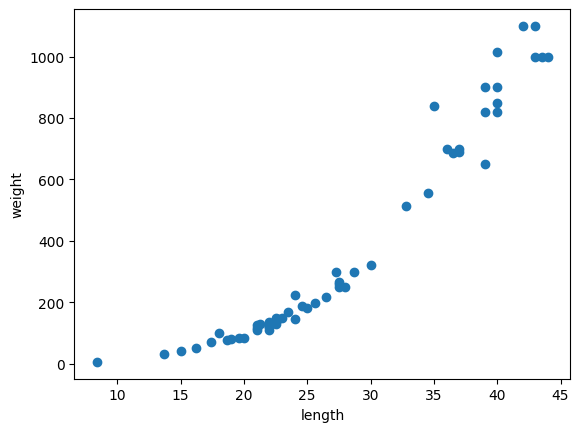

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
#나눈 훈련 세트와 테스트 세트의 모양 확인(입력값은 2차원이어야 하므로 확인하고 수정하는 과정이 반드시 필요함)
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


In [ ]:
#2차원으로 모양 바꿔주기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [ ]:
#모델 생성
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [ ]:
#모델 훈련
knr.fit(train_input,train_target)

#모델 확인(아래 점수는 결정계수이다)
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
#훈련세트로 모델을 다시 확인해보자(점수가 다를 것이다)
#훈련한 세트인 훈련 세트로 모델을 확인했을 때 결정계수가 더 낮다는 것은 모델이 과소적합 되었다는 것을 의미한다.
#이 때는 모델을 더욱 복잡하게 만들어 해결할 수 있다.(이웃의 개수를 줄이는 방식 활용)
knr.score(train_input, train_target)

0.9698823289099254

In [ ]:
#이웃의 개수 줄이기(기본 5개에서 3개로 줄임)
knr.n_neighbors = 3

In [ ]:
#점수가 이전보다 높아짐
knr.score(train_input,train_target)

0.9804899950518966

In [ ]:
#테스트 세트에 대한 점수 -> 훈련 세트에 대한 점수가 테스트 세트에 대한 점수보다 약간 더 크므로 적합한 모델이다.
knr.score(test_input, test_target)

0.9746459963987609

In [ ]:
#KNN 회귀 머신으로 값을 구해보자
#KNN 회귀 머신은 가까운 이웃들간의 '평균'을 계산하는 머신이다.
distance, indexes = knr.kneighbors([[50]])

In [ ]:
result = np.mean(train_target[indexes])
print(result)

1033.3333333333333


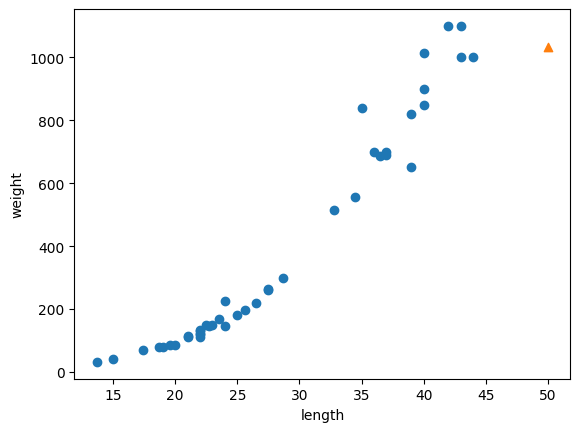

In [ ]:
#그래프로 확인(구하고자 하는 값 세모로 표시)
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#이상한 점은 target_input을 100으로 해도 같은 결과가 나온다는 것이다
distance, indexes = knr.kneighbors([[100]])

In [ ]:
mean2 = np.mean(train_target[indexes])
print(mean2)

1033.3333333333333


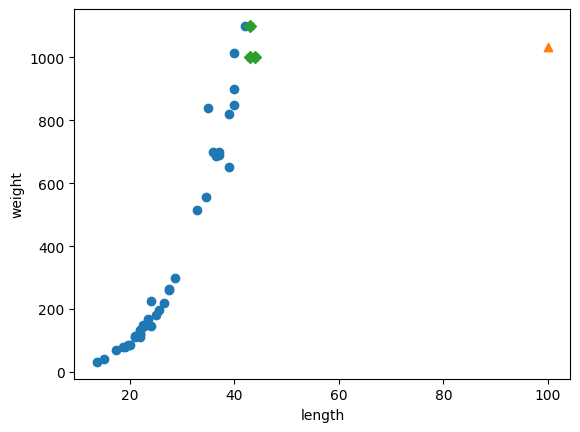

In [ ]:
#아래 그림을 보면 알 수 있듯이 값이 아무리 커지더라도 KNN 회귀 방식을 사용하면 항상 이웃한 값은 저 3개가 된다.
#즉 예측하고자 하는 값이 훈련세트를 벗어나게 되면 엉뚱한 값을 예측하게된다.
#이 문제는 KNN 회귀 머신을 사용해서 해결하기에는 부적합하다.
plt.scatter(train_input, train_target)
plt.scatter(100, 1033, marker = "^")
plt.scatter(train_input[indexes],train_target[indexes], marker ="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#선형 회귀 사용
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [ ]:
#선형 회귀 모델이 만든 직선 눈으로 확인해보기

# 기울기와 절편을 구한다
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


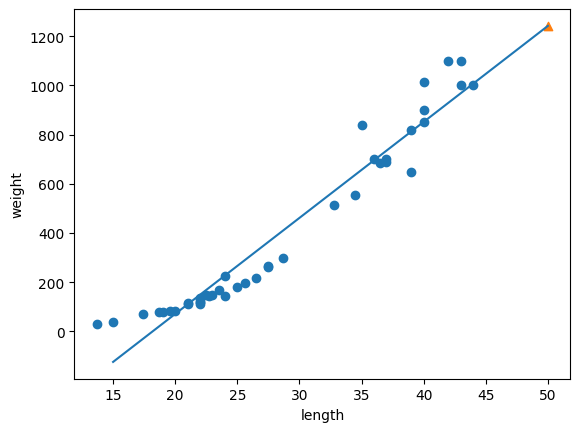

In [ ]:
#선형 회귀 모델로 예측한 값이 기울기와 절편을 바탕으로 그린 직선 위에 존재한다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_ + lr.intercept_])

plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
lr.score(test_input, test_target)

0.939846333997604


0.8247503123313558

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------#

In [ ]:
#다항 회귀

In [ ]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
#훈련 세트의 입력값 형태가 바뀌었으므로 예측하고자 하는 값을 넣을 때도 같은 형식으로 입력해야 한다.
lr.predict([[50**2,50]])

array([1573.98423528])

In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


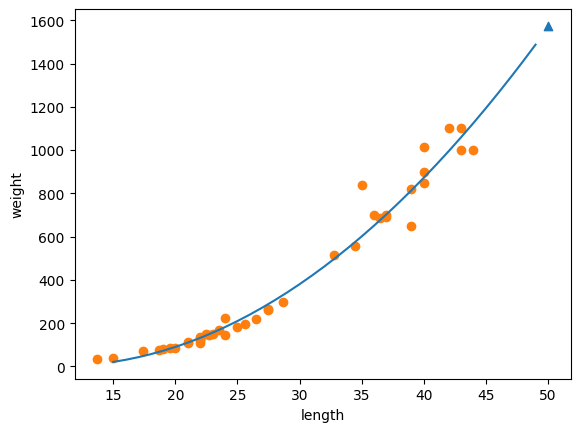

In [ ]:
#위와 같이 그래프로 확인하는 과정
point = np.arange(15,50)
plt.plot(point,1.01*(point**2)-21.5*point+116)
plt.scatter(50, 1574, marker ="^")

plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#과소 적합 문제가 존재한다.
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
